<a href="https://colab.research.google.com/github/greatvic/colapy/blob/main/3D_Animate_Solar_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


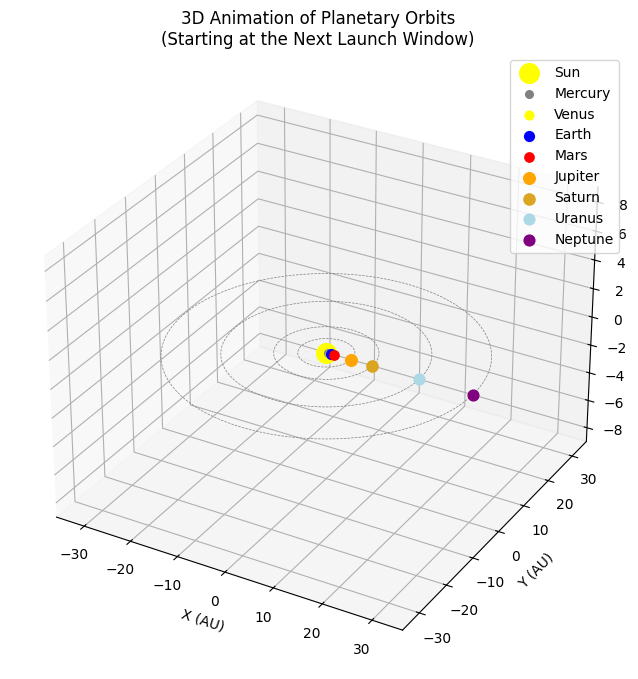

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Define planet parameters: radius in AU, period in Earth years, color, and size.
planets = {
    'Mercury': {'radius': 0.39, 'period': 0.24,  'color': 'gray',      'size': 30},
    'Venus':   {'radius': 0.72, 'period': 0.62,  'color': 'yellow',    'size': 40},
    'Earth':   {'radius': 1.00, 'period': 1.00,  'color': 'blue',      'size': 50},
    'Mars':    {'radius': 1.52, 'period': 1.88,  'color': 'red',       'size': 45},
    'Jupiter': {'radius': 5.20, 'period': 11.86, 'color': 'orange',    'size': 70},
    'Saturn':  {'radius': 9.58, 'period': 29.46, 'color': 'goldenrod', 'size': 65},
    'Uranus':  {'radius': 19.2, 'period': 84.01, 'color': 'lightblue', 'size': 60},
    'Neptune': {'radius': 30.05, 'period': 164.8, 'color': 'purple',    'size': 60}
}

# Create the figure and a 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sun at the center
ax.scatter(0, 0, 0, color='yellow', s=200, label='Sun')

# Pre-compute and plot the orbits as dashed circles (all orbits lie in the ecliptic plane, z=0)
theta = np.linspace(0, 2 * np.pi, 200)
for name, props in planets.items():
    r = props['radius']
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.zeros_like(theta)
    ax.plot(x, y, z, linestyle='--', color='gray', linewidth=0.5)

# Create a scatter plot for each planet at the "next launch window" (t = 0, all planets along +x axis)
planet_markers = {}
for name, props in planets.items():
    x = props['radius']  # cos(0) = 1
    y = 0              # sin(0) = 0
    z = 0
    scatter = ax.scatter(x, y, z, color=props['color'], s=props['size'], label=name)
    planet_markers[name] = scatter

# Set axis limits (extend a bit beyond Neptune's orbit)
max_radius = max([p['radius'] for p in planets.values()])
limit = max_radius * 1.2
ax.set_xlim([-limit, limit])
ax.set_ylim([-limit, limit])
ax.set_zlim([-limit/4, limit/4])  # The orbits are nearly flat

# Label the axes and add a title
ax.set_xlabel("X (AU)")
ax.set_ylabel("Y (AU)")
ax.set_zlabel("Z (AU)")
ax.set_title("3D Animation of Planetary Orbits\n(Starting at the Next Launch Window)")
ax.legend(loc='upper right')

# Define the animation update function
def update(frame):
    t = frame * 0.01  # time in Earth years; adjust this factor to speed up or slow down the animation
    for name, props in planets.items():
        # Calculate the planet's angular position based on its period
        theta_p = 2 * np.pi * (t / props['period'])
        r = props['radius']
        x = r * np.cos(theta_p)
        y = r * np.sin(theta_p)
        z = 0  # All orbits lie in the ecliptic plane
        # Update the scatter plot data.
        planet_markers[name]._offsets3d = (np.array([x]), np.array([y]), np.array([z]))
    return list(planet_markers.values())

# Create the animation object.
anim = FuncAnimation(fig, update, frames=np.arange(0, 1000), interval=50, blit=False)

# Render the animation as an HTML5 video.
HTML(anim.to_html5_video())
# Save the animation as an HTML file
#html = anim.to_html5_video()  # or anim.to_jshtml()
#with open("animation.html", "w") as f:
#    f.write(html)

In [ ]:
pip install plotly

In [41]:
import numpy as np
import plotly.graph_objects as go

# --- Define planet orbital parameters ---
# Orbital radius (in AU), period (in Earth years), and color.
planets = {
    'Mercury': {'radius': 0.39, 'period': 0.24,  'color': 'gray'},
    'Venus':   {'radius': 0.72, 'period': 0.62,  'color': 'yellow'},
    'Earth':   {'radius': 1.00, 'period': 1.00,  'color': 'lightblue'},
    'Mars':    {'radius': 1.52, 'period': 1.88,  'color': 'red'},
    'Jupiter': {'radius': 5.20, 'period': 11.86, 'color': 'orange'},
    'Saturn':  {'radius': 9.58, 'period': 29.46, 'color': 'goldenrod'},
    'Uranus':  {'radius': 19.2, 'period': 84.01, 'color': 'lightblue'},
    'Neptune': {'radius': 30.05, 'period': 164.8, 'color': 'purple'}
}

# --- Define actual diameters (in kilometers) ---
# (Approximate values.)
planet_diameters = {
    'Mercury': 4880,
    'Venus': 12104,
    'Earth': 12742,
    'Mars': 6779,
    'Jupiter': 139820,
    'Saturn': 116460,
    'Uranus': 50724,
    'Neptune': 49244
}
sun_diameter = 1391000  # km

# --- Marker size scaling ---
# Use a smaller base size for planets so inner planets remain distinct.
planet_base_size = 2  # base size for planets (in pixels)
earth_diameter = planet_diameters['Earth']

def compute_marker_size(diameter, base=planet_base_size):
    # Cube-root scaling to compress the large differences.
    return base * (diameter / earth_diameter) ** (1/3)

# Compute marker sizes for each planet.
marker_sizes = {name: compute_marker_size(diam)
                for name, diam in planet_diameters.items()}

# Compute the Sun's marker size using a larger base (for relative scale)
# but then reduce it so it doesn't cover the inner planets.
sun_marker_size = compute_marker_size(sun_diameter, base=4) * 0.3

# --- Create a Plotly figure ---
fig = go.Figure()

# === Add orbit paths (static) ===
theta = np.linspace(0, 2 * np.pi, 200)
for name, props in planets.items():
    r = props['radius']
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.zeros_like(theta)
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='lines',
        line=dict(color='white', width=1),
        name=f"{name} Orbit",
        showlegend=False  # Hide orbit paths from legend
    ))

# === Add planet markers at initial positions (t = 0; along +x axis) ===
for name, props in planets.items():
    r = props['radius']
    x = r  # at t = 0, angle = 0 => position along +x
    y = 0
    z = 0
    fig.add_trace(go.Scatter3d(
        x=[x], y=[y], z=[z],
        mode='markers',
        marker=dict(
            size=marker_sizes[name],
            color=props['color']
        ),
        name=name
    ))

# === Add the Sun as a static trace at the center ===
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(
        size=sun_marker_size,
        color='orange'
    ),
    name='Sun'
))

# --- Create frames for animation ---
# The first len(planets) traces (indices 0-7) are orbits (static);
# the next len(planets) traces (indices 8-15) are planet markers.
n_planets = len(planets)
n_frames = 500  # Total number of animation frames.
dt = 0.1       # Time increment per frame (in Earth years)

frames = []
planet_names = list(planets.keys())
for frame in range(n_frames):
    t = frame * dt
    frame_data = []
    for name in planet_names:
        props = planets[name]
        # Angular position computed using the actual orbital period.
        angle = 2 * np.pi * (t / props['period'])
        x = props['radius'] * np.cos(angle)
        y = props['radius'] * np.sin(angle)
        z = 0
        # Wrap updated data in a Scatter3d object.
        frame_data.append(go.Scatter3d(x=[x], y=[y], z=[z]))
    frames.append(go.Frame(data=frame_data, name=str(frame),
                           traces=list(range(n_planets, 2 * n_planets))))
fig.frames = frames

# --- Set up layout with black background, white axes, and animation controls ---
fig.update_layout(
    legend=dict(
        font=dict(
            color="white"  # font_color
        )
    ),
    scene=dict(
        bgcolor="black",  # overall background for the 3D scene
        xaxis=dict(
            title="X (AU)",
            color="white",  # axis labels and tick color
            backgroundcolor="black",  # background of the x-axis pane
            gridcolor="black",        # gridlines become black (invisible)
            zerolinecolor="black"     # zero line color
        ),
        yaxis=dict(
            title="Y (AU)",
            color="white",
            backgroundcolor="black",
            gridcolor="black",
            zerolinecolor="black"
        ),
        zaxis=dict(
            title="Z (AU)",
            color="white",
            backgroundcolor="black",
            gridcolor="black",
            zerolinecolor="black"
        )
    ),
    paper_bgcolor="black",
    plot_bgcolor="black",
    updatemenus=[dict(
        type="buttons",
        font=dict(color="white"),  # This changes the button text to white
        showactive=False,
        y=1,
        x=0.8,
        xanchor="left",
        yanchor="bottom",
        buttons=[
            dict(
                label="Play",
                method="animate",
                args=[None, {
                    "frame": {"duration": 50, "redraw": True},
                    "fromcurrent": True,
                    "transition": {"duration": 0}
                }]
            ),
            dict(
                label="Stop",
                method="animate",
                args=[[None], {
                    "frame": {"duration": 0, "redraw": True},
                    "mode": "immediate",
                    "transition": {"duration": 0}
                }]
            )
        ]
    )],
    sliders=[dict(
        font=dict(color="white"),  # This changes the slider numbers to white
        steps=[dict(method="animate",
                    args=[[str(frame)],
                          {"frame": {"duration": 50, "redraw": True},
                           "mode": "immediate",
                           "transition": {"duration": 0}}],
                    label=str(frame))
               for frame in range(n_frames)],
        active=0,
        transition={"duration": 0},
        x=0,
        y=0,
        currentvalue=dict(font=dict(size=12, color="white"),
                          prefix="Frame: ", visible=True, xanchor="center"),
        len=1.0
    )],
    title=dict(text="Interactive 3D Animation of the Solar System", font=dict(color="white"))
)

# Optionally, set fixed axis limits (extending a bit beyond Neptune's orbit).
limit = 30.05 * 1.2
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-limit, limit]),
        yaxis=dict(range=[-limit, limit]),
        zaxis=dict(range=[-limit/4, limit/4])
    )
)

fig.show()

In [40]:
import numpy as np
import plotly.graph_objects as go

# --- Define planet orbital parameters ---
# Orbital radius (in AU), period (in Earth years), and color.
planets = {
    'Mercury': {'radius': 0.39, 'period': 0.24,  'color': 'gray'},
    'Venus':   {'radius': 0.72, 'period': 0.62,  'color': 'yellow'},
    'Earth':   {'radius': 1.00, 'period': 1.00,  'color': 'lightblue'},
    'Mars':    {'radius': 1.52, 'period': 1.88,  'color': 'red'},
    'Jupiter': {'radius': 5.20, 'period': 11.86, 'color': 'orange'},
    'Saturn':  {'radius': 9.58, 'period': 29.46, 'color': 'goldenrod'},
    'Uranus':  {'radius': 19.2, 'period': 84.01, 'color': 'lightblue'},
    'Neptune': {'radius': 30.05, 'period': 164.8, 'color': 'purple'}
}

# --- Define actual diameters (in kilometers) ---
# (Approximate values.)
planet_diameters = {
    'Mercury': 4880,
    'Venus': 12104,
    'Earth': 12742,
    'Mars': 6779,
    'Jupiter': 139820,
    'Saturn': 116460,
    'Uranus': 50724,
    'Neptune': 49244
}
sun_diameter = 1391000  # km

# --- Marker size scaling ---
# Use a smaller base size for planets so inner planets remain distinct.
planet_base_size = 2  # base size for planets (in pixels)
earth_diameter = planet_diameters['Earth']

def compute_marker_size(diameter, base=planet_base_size):
    # Cube-root scaling to compress the large differences.
    return base * (diameter / earth_diameter) ** (1/3)

# Compute marker sizes for each planet.
marker_sizes = {name: compute_marker_size(diam)
                for name, diam in planet_diameters.items()}

# Compute the Sun's marker size using a larger base (for relative scale)
# but then reduce it so it doesn't cover the inner planets.
sun_marker_size = compute_marker_size(sun_diameter, base=4) * 0.3

# --- Create a Plotly figure ---
fig = go.Figure()

# === Add orbit paths (static) ===
theta = np.linspace(0, 2 * np.pi, 200)
for name, props in planets.items():
    r = props['radius']
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.zeros_like(theta)
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='lines',
        line=dict(color='white', width=1),
        name=f"{name} Orbit",
        showlegend=False  # Hide orbit paths from legend
    ))

# === Add planet markers at initial positions (t = 0; along +x axis) ===
for name, props in planets.items():
    r = props['radius']
    x = r  # at t = 0, angle = 0 => position along +x
    y = 0
    z = 0
    fig.add_trace(go.Scatter3d(
        x=[x], y=[y], z=[z],
        mode='markers',
        marker=dict(
            size=marker_sizes[name],
            color=props['color']
        ),
        name=name
    ))

# === Add the Sun as a static trace at the center ===
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(
        size=sun_marker_size,
        color='orange'
    ),
    name='Sun'
))

# --- Create frames for animation ---
# The first len(planets) traces (indices 0-7) are orbits (static);
# the next len(planets) traces (indices 8-15) are planet markers.
n_planets = len(planets)
n_frames = 500  # Total number of animation frames.
dt = 0.1       # Time increment per frame (in Earth years)

frames = []
planet_names = list(planets.keys())
for frame in range(n_frames):
    t = frame * dt
    frame_data = []
    for name in planet_names:
        props = planets[name]
        # Angular position computed using the actual orbital period.
        angle = 2 * np.pi * (t / props['period'])
        x = props['radius'] * np.cos(angle)
        y = props['radius'] * np.sin(angle)
        z = 0
        # Wrap updated data in a Scatter3d object.
        frame_data.append(go.Scatter3d(x=[x], y=[y], z=[z]))
    frames.append(go.Frame(data=frame_data, name=str(frame),
                           traces=list(range(n_planets, 2 * n_planets))))
fig.frames = frames

# --- Set up layout with black background, white axes, and animation controls ---
fig.update_layout(
    legend=dict(
        font=dict(
            color="white"  # font_color
        )
    ),
    scene=dict(
        bgcolor="black",  # overall background for the 3D scene
        xaxis=dict(
            title="X (AU)",
            color="white",  # axis labels and tick color
            backgroundcolor="black",  # background of the x-axis pane
            gridcolor="black",        # gridlines become black (invisible)
            zerolinecolor="black"     # zero line color
        ),
        yaxis=dict(
            title="Y (AU)",
            color="white",
            backgroundcolor="black",
            gridcolor="black",
            zerolinecolor="black"
        ),
        zaxis=dict(
            title="Z (AU)",
            color="white",
            backgroundcolor="black",
            gridcolor="black",
            zerolinecolor="black"
        )
    ),
    paper_bgcolor="black",
    plot_bgcolor="black",
    updatemenus=[dict(
        type="buttons",
        font=dict(color="white"),  # This changes the button text to white
        showactive=False,
        y=1,
        x=0.8,
        xanchor="left",
        yanchor="bottom",
        buttons=[
            dict(
                label="Play",
                method="animate",
                args=[None, {
                    "frame": {"duration": 50, "redraw": True},
                    "fromcurrent": True,
                    "transition": {"duration": 0}
                }]
            ),
            dict(
                label="Stop",
                method="animate",
                args=[[None], {
                    "frame": {"duration": 0, "redraw": True},
                    "mode": "immediate",
                    "transition": {"duration": 0}
                }]
            )
        ]
    )],
    sliders=[dict(
        font=dict(color="white"),  # This changes the slider numbers to white
        steps=[dict(method="animate",
                    args=[[str(frame)],
                          {"frame": {"duration": 50, "redraw": True},
                           "mode": "immediate",
                           "transition": {"duration": 0}}],
                    label=str(frame))
               for frame in range(n_frames)],
        active=0,
        transition={"duration": 0},
        x=0,
        y=0,
        currentvalue=dict(font=dict(size=12, color="white"),
                          prefix="Frame: ", visible=True, xanchor="center"),
        len=1.0
    )],
    title=dict(text="Interactive 3D Animation of the Solar System", font=dict(color="white"))
)

# Optionally, set fixed axis limits (extending a bit beyond Neptune's orbit).
limit = 30.05 * 1.2
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-limit, limit]),
        yaxis=dict(range=[-limit, limit]),
        zaxis=dict(range=[-limit/4, limit/4])
    )
)

fig.show()